# MINI PROJECT-3

### INTRODUCTION-
**Accelerate, a private education provider focused on accelerating achievement in secondary education, your task was to build and evaluate a model that accurately predicts a student's final assessment score. This model would be used by the student evaluation committee to determine which students to accept into Accelerate's program, as high scores in international examinations can lead to opportunities for scholarships at prestigious universities.**

# OBJECTIVE-
**There are various files containing the information which are belived to be useful indicators of student performance.The main objective is to flow through the information and prepare a clean dataset on which to build a high-performing regression model.**

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import re

seed = 1234

In [2]:
# Step 1: Load the CSV files and convert column names to lowercase
df_assessments = pd.read_csv('train_assessments.csv').rename(columns=str.lower)

In [3]:
df_assessments.head(10)

,internalassessmentnumber,studentid,internalassessmentscore
0,2.0,0.0,114.681987
1,4.0,0.0,86.965750
2,NaN,2.0,55.604654
3,NaN,2.0,NaN
4,3.0,2.0,39.553462
5,4.0,2.0,69.035396
6,0.0,3.0,55.874574
7,1.0,3.0,NaN
8,2.0,3.0,48.000062
9,3.0,3.0,53.598187


In [4]:
# Aggregate the internal assessment scores by student ID
df_assessments_agg = df_assessments.groupby('studentid')['internalassessmentscore'].mean().reset_index()
df_assessments_agg.columns = ['studentid', 'aggregatedinternalassessmentscore']

In [5]:
# Merge the aggregated scores back to the original assessments dataframe
df_assessments_merged = pd.merge(df_assessments, df_assessments_agg, on='studentid')

In [6]:
# Drop the individual assessment scores column
df_assessments_merged.drop('internalassessmentscore', axis=1, inplace=True)

In [7]:
df_assessments_merged['internalassessmentnumber'].fillna(df_assessments_merged['internalassessmentnumber'].mean(), inplace=True)
df_assessments_merged['studentid'].fillna(df_assessments_merged['studentid'].mean(), inplace=True)

In [8]:
# Save the updated assessments dataframe
df_assessments_merged.to_csv('train_assessments_merged.csv', index=False)

In [9]:
# Load the CSV files
df_assessments = pd.read_csv('train_assessments_merged.csv')
df_effort = pd.read_csv('train_effort.csv').rename(columns=str.lower)
df_external_factors = pd.read_csv('train_external_factors.csv').rename(columns=str.lower)
df_literacy = pd.read_csv('train_literacy.csv').rename(columns=str.lower)
df_students = pd.read_csv('train_students.csv').rename(columns=str.lower)

In [10]:
# Merge the datasets based on the 'studentid' column
df_merged = pd.merge(df_students, df_assessments, on='studentid')
df_merged = pd.merge(df_merged, df_effort, on='studentid')
df_merged = pd.merge(df_merged, df_external_factors, on='studentid')
df_merged = pd.merge(df_merged, df_literacy, on='studentid')

In [11]:
# Save the merged dataset
df_merged.to_csv('merged_dataset.csv', index=False)

**The dataset is comprised with multiple files stated above and the files has been merged based on the common identifier such as "studentid" to create a consolidated dataset.**

In [12]:
# Load the merged dataset
df_merged = pd.read_csv('merged_dataset.csv',index_col=0)

In [13]:
df_merged.head(10)

,studentid,parenteduc,isfirstchild,nrsiblings,schooltravel,practicesport,wklystudyhours,finalassessmentscore,eldestsiblingatschool,internalassessmentnumber,...,motivation,grit,persistence,otherfactors,roundness,mathscore,literacyclassabscence,literacy,teacherpresense,priorstudies
unnamed: 0,,,,,,,,,,,,,,,,,,,,,
283,21861,some high school,no,3.0,private,regularly,4,70,Yes,0.000000,...,10.953729,4.077902,78.432773,90.390118,73.992499,70.0,0.0,7569.0,2.0,-0.045977
283,21861,some high school,no,3.0,private,regularly,4,70,Yes,1.000000,...,10.953729,4.077902,78.432773,90.390118,73.992499,70.0,0.0,7569.0,2.0,-0.045977
283,21861,some high school,no,3.0,private,regularly,4,70,Yes,2.000000,...,10.953729,4.077902,78.432773,90.390118,73.992499,70.0,0.0,7569.0,2.0,-0.045977
283,21861,some high school,no,3.0,private,regularly,4,70,Yes,3.000000,...,10.953729,4.077902,78.432773,90.390118,73.992499,70.0,0.0,7569.0,2.0,-0.045977
283,21861,some high school,no,3.0,private,regularly,4,70,Yes,1.998376,...,10.953729,4.077902,78.432773,90.390118,73.992499,70.0,0.0,7569.0,2.0,-0.045977
349,1278,NaN,yes,2.0,NaN,sometimes,4,90,Yes,0.000000,...,12.228830,NaN,70.475087,79.203696,71.850632,90.0,-1.0,6972.0,8.0,-0.771084
349,1278,NaN,yes,2.0,NaN,sometimes,4,90,Yes,2.000000,...,12.228830,NaN,70.475087,79.203696,71.850632,90.0,-1.0,6972.0,8.0,-0.771084
349,1278,NaN,yes,2.0,NaN,sometimes,4,90,Yes,1.998376,...,12.228830,NaN,70.475087,79.203696,71.850632,90.0,-1.0,6972.0,8.0,-0.771084
349,1278,NaN,yes,2.0,NaN,sometimes,4,90,Yes,4.000000,...,12.228830,NaN,70.475087,79.203696,71.850632,90.0,-1.0,6972.0,8.0,-0.771084


In [14]:
df_merged.drop_duplicates(subset=['studentid'], inplace=True) #Dropped the 'duplicates' caused after merging the files.

In [15]:
df_merged.head(20)

,studentid,parenteduc,isfirstchild,nrsiblings,schooltravel,practicesport,wklystudyhours,finalassessmentscore,eldestsiblingatschool,internalassessmentnumber,...,motivation,grit,persistence,otherfactors,roundness,mathscore,literacyclassabscence,literacy,teacherpresense,priorstudies
unnamed: 0,,,,,,,,,,,,,,,,,,,,,
283,21861,some high school,no,3.0,private,regularly,4,70,Yes,0.000000,...,10.953729,4.077902,78.432773,90.390118,73.992499,70.0,0.0,7569.0,2.0,-0.045977
349,1278,NaN,yes,2.0,NaN,sometimes,4,90,Yes,0.000000,...,12.228830,NaN,70.475087,79.203696,71.850632,90.0,-1.0,6972.0,8.0,-0.771084
358,19134,associate's degree,yes,4.0,school_bus,sometimes,4,81,Yes,0.000000,...,16.370401,4.200314,32.357844,74.278064,76.348480,81.0,8.0,7209.0,1.0,-0.011236
885,29547,high school,no,2.0,private,never,4,49,Yes,1.000000,...,15.897535,3.893858,50.137966,NaN,91.762443,49.0,-3.0,2650.0,0.0,-0.000000
94,17950,some high school,yes,0.0,private,regularly,4,74,Yes,0.000000,...,16.649998,4.414265,84.753160,89.219221,78.553398,74.0,-3.0,5548.0,3.0,-0.123288
758,5461,associate's degree,yes,1.0,private,sometimes,4,62,Yes,2.000000,...,14.330279,4.303784,85.523410,79.243374,77.404066,62.0,-5.0,5396.0,6.0,-0.507042
971,14111,some college,no,3.0,private,never,4,86,Yes,1.998376,...,17.914653,4.044525,78.373689,76.560495,85.626307,86.0,NaN,6225.0,7.0,-0.590361
804,10217,bachelor's degree,no,2.0,school_bus,never,4,71,Yes,0.000000,...,9.959735,3.662385,69.180768,79.212178,74.702177,71.0,-5.0,4026.0,5.0,-0.409836
503,10855,some college,yes,1.0,school_bus,sometimes,4,90,Yes,0.000000,...,19.983644,4.317570,54.270831,75.806564,75.403445,90.0,-5.0,5694.0,7.0,-0.671233


In [16]:
df_merged.shape  # Display the dimensions of the dataset

(18349, 27)

In [17]:
df_merged.dtypes  # Display data types of columns

studentid                              int64
parenteduc                            object
isfirstchild                          object
nrsiblings                           float64
schooltravel                          object
practicesport                         object
wklystudyhours                         int64
finalassessmentscore                   int64
eldestsiblingatschool                 object
internalassessmentnumber             float64
aggregatedinternalassessmentscore    float64
engagement                           float64
engagementscore                      float64
avgtutorperceptionscore              float64
teacherperceptionscore               float64
healthylifestyle                     float64
stability                            float64
motivation                           float64
grit                                 float64
persistence                          float64
otherfactors                         float64
roundness                            float64
mathscore 

In [18]:
df_merged.isnull().sum()  # Check count of missing values in each column

studentid                               0
parenteduc                           1083
isfirstchild                          583
nrsiblings                            951
schooltravel                         1866
practicesport                         358
wklystudyhours                          0
finalassessmentscore                    0
eldestsiblingatschool                   0
internalassessmentnumber                0
aggregatedinternalassessmentscore      29
engagement                            911
engagementscore                       948
avgtutorperceptionscore               886
teacherperceptionscore                936
healthylifestyle                      875
stability                             931
motivation                            924
grit                                  899
persistence                           977
otherfactors                          937
roundness                             915
mathscore                             945
literacyclassabscence             

In [19]:
from sklearn.impute import KNNImputer
# Impute null values with KNN for numerical columns
numerical_columns = ['nrsiblings', 'aggregatedinternalassessmentscore','engagement','engagementscore','avgtutorperceptionscore','teacherperceptionscore','healthylifestyle','stability','motivation','grit','persistence','otherfactors','roundness','mathscore','literacyclassabscence','literacy','teacherpresense','priorstudies']
imputer = KNNImputer(n_neighbors=5)
df_merged[numerical_columns] = imputer.fit_transform(df_merged[numerical_columns])

In [20]:
# Impute null values with a specific value for text columns
text_columns = ['parenteduc', 'isfirstchild', 'schooltravel','practicesport','eldestsiblingatschool']
fill_value = 'Unknown'
df_merged[text_columns] = df_merged[text_columns].fillna(fill_value)

In [21]:
df_merged.isnull().sum()

studentid                            0
parenteduc                           0
isfirstchild                         0
nrsiblings                           0
schooltravel                         0
practicesport                        0
wklystudyhours                       0
finalassessmentscore                 0
eldestsiblingatschool                0
internalassessmentnumber             0
aggregatedinternalassessmentscore    0
engagement                           0
engagementscore                      0
avgtutorperceptionscore              0
teacherperceptionscore               0
healthylifestyle                     0
stability                            0
motivation                           0
grit                                 0
persistence                          0
otherfactors                         0
roundness                            0
mathscore                            0
literacyclassabscence                0
literacy                             0
teacherpresense          

In [22]:
df_merged.head()

,studentid,parenteduc,isfirstchild,nrsiblings,schooltravel,practicesport,wklystudyhours,finalassessmentscore,eldestsiblingatschool,internalassessmentnumber,...,motivation,grit,persistence,otherfactors,roundness,mathscore,literacyclassabscence,literacy,teacherpresense,priorstudies
unnamed: 0,,,,,,,,,,,,,,,,,,,,,
283,21861,some high school,no,3.0,private,regularly,4,70,Yes,0.0,...,10.953729,4.077902,78.432773,90.390118,73.992499,70.0,0.0,7569.0,2.0,-0.045977
349,1278,Unknown,yes,2.0,Unknown,sometimes,4,90,Yes,0.0,...,12.228830,4.091281,70.475087,79.203696,71.850632,90.0,-1.0,6972.0,8.0,-0.771084
358,19134,associate's degree,yes,4.0,school_bus,sometimes,4,81,Yes,0.0,...,16.370401,4.200314,32.357844,74.278064,76.348480,81.0,8.0,7209.0,1.0,-0.011236
885,29547,high school,no,2.0,private,never,4,49,Yes,1.0,...,15.897535,3.893858,50.137966,76.584439,91.762443,49.0,-3.0,2650.0,0.0,-0.000000
94,17950,some high school,yes,0.0,private,regularly,4,74,Yes,0.0,...,16.649998,4.414265,84.753160,89.219221,78.553398,74.0,-3.0,5548.0,3.0,-0.123288


C:\Users\Manish\AppData\Local\Temp\ipykernel_5856\394443252.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_merged.corr()


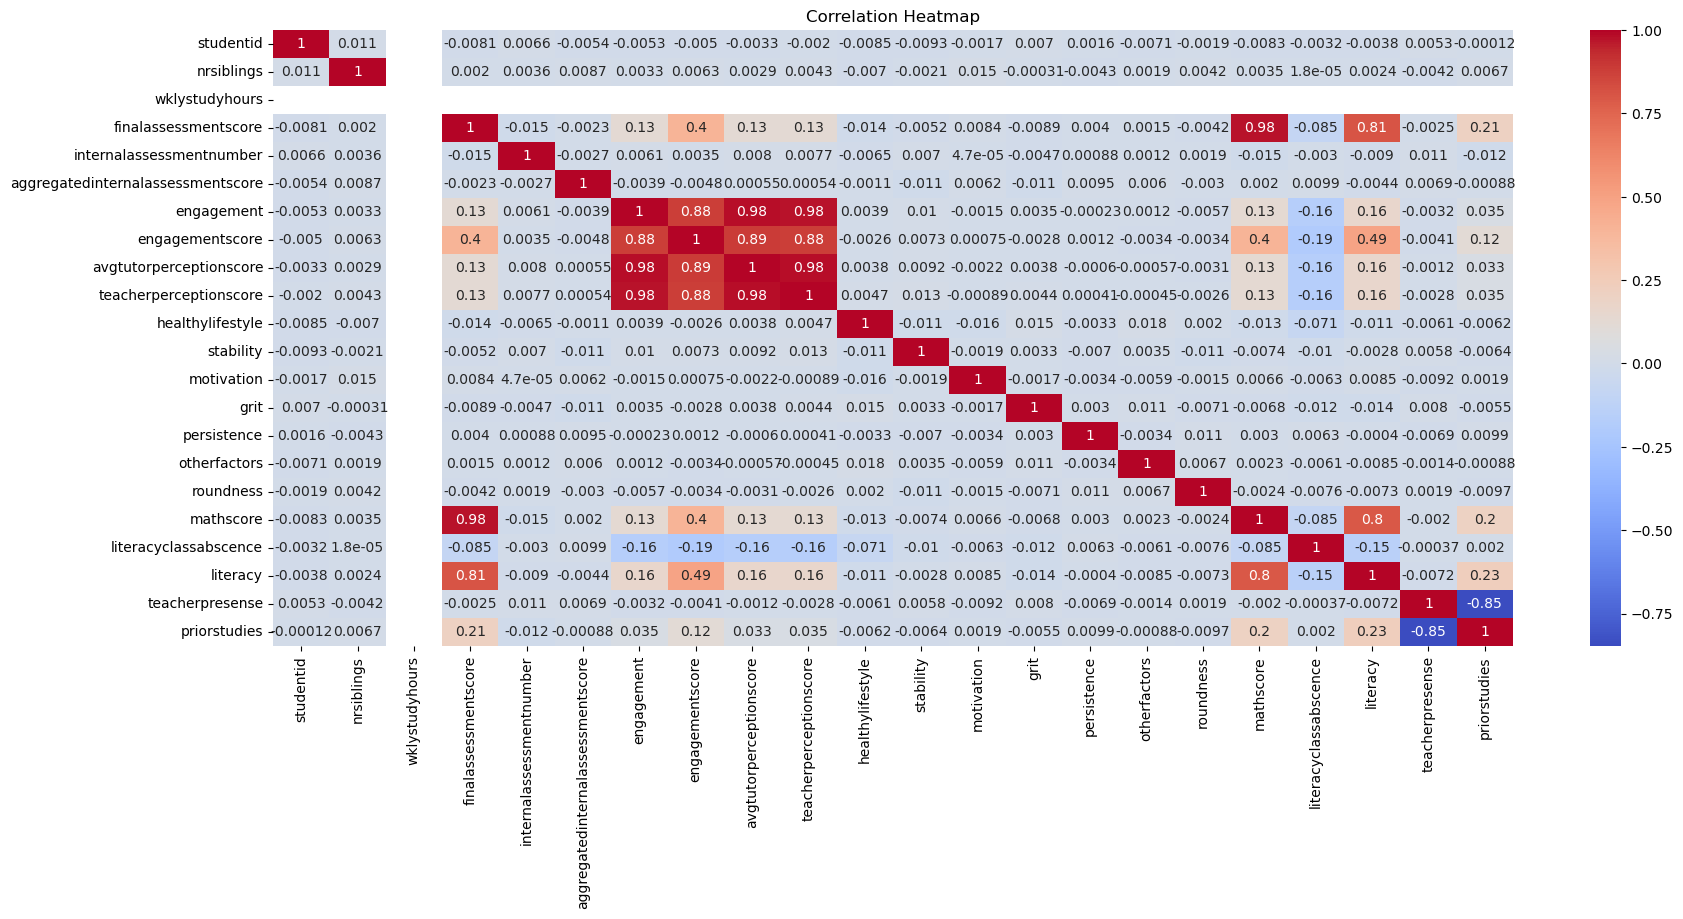

In [23]:
# Calculate the correlation matrix
correlation_matrix = df_merged.corr()

# Plot the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
# Specify the text columns
text_columns = ['parenteduc', 'isfirstchild', 'schooltravel', 'practicesport', 'eldestsiblingatschool']

# Split the data into features (X) and target (y)
X = df_merged.drop(columns=['finalassessmentscore'])
y = df_merged['finalassessmentscore']

# Perform one-hot encoding on the text columns
X_encoded = pd.get_dummies(X, columns=text_columns)

# Split the encoded data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (14679, 39) (14679,)
Test set shape: (3670, 39) (3670,)


# MODELLING-
**After preparing the dataset, proceeded to build regression models to predict the final assessment scores and experimented with different algorithms such as XGBoost, Random Forest, and Gradient Boosting. By fine-tuning the hyperparameters of these models to achieve the best possible performance. You evaluated the models using appropriate metrics such as root mean squared error (RMSE) on both the training and test sets to assess their predictive accuracy. But choose to go with the Random forest because was not much overfitting compared to other models. Could have worked more with other models but the time constrain the computation was expensive.**

# Random Forest:
**Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It creates a "forest" of trees, where each tree is built using a random subset of features and a random subset of data samples. During prediction, each tree in the forest independently produces a prediction, and the final prediction is determined by averaging the predictions of all the trees.**

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create the Random Forest regressor with the specified hyperparameters
model = RandomForestRegressor(
    n_estimators=900,
    max_depth=20,
    min_samples_split=8,
    min_samples_leaf=6,
    max_features=1.0,
    random_state=42
)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the train and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE) on the train and test sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Root Mean Squared Error (RMSE) on train set:", rmse_train)
print("Root Mean Squared Error (RMSE) on test set:", rmse_test)

Root Mean Squared Error (RMSE) on train set: 2.2998552547875475
Root Mean Squared Error (RMSE) on test set: 2.8449569057162503


# EXPLANABILITY-
**To gain insights into the model's behavior and feature importance, applied explainability techniques such as feature importances, permutation feature importance. This allowed you to identify the key features that strongly influenced the prediction of the final assessment scores. Understanding these important features could provide valuable insights for the student evaluation committee in their decision-making process. By obseving features like "mathscore" which infuenced more for the final scores. Whereas "literacy" showing some where between 0 to 0.2. The rest of the features are blank without any bars, it suggests that the permutation feature importance calculation did not yield meaningful results for those features or the data processing could probably not efficient apart from it there are several factors- Irrelevant Features, Linear Relationships, Target Leakage.**

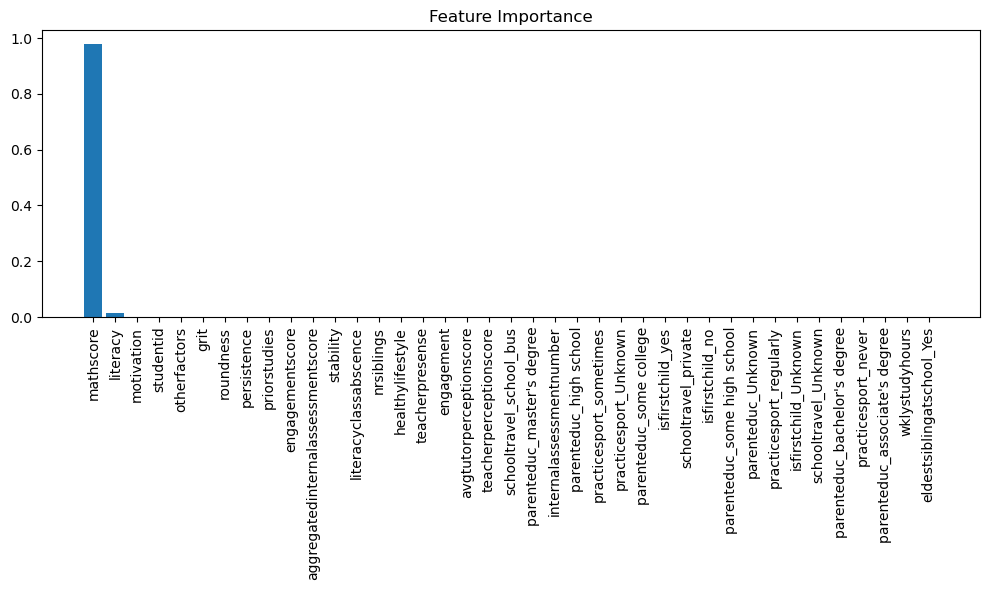

In [49]:
# Get feature importances from the trained model
importances = model.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

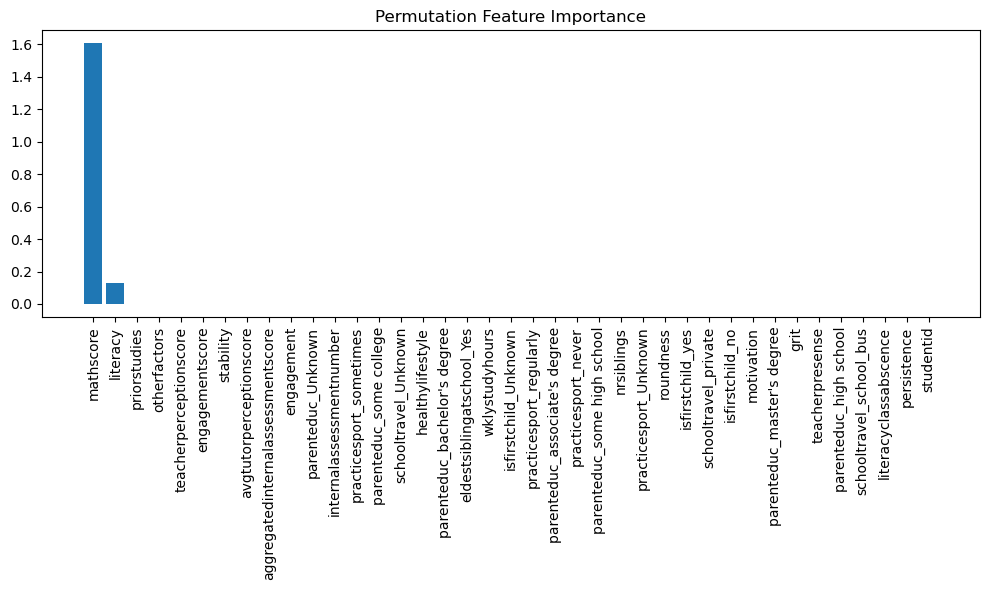

In [50]:
from sklearn.inspection import permutation_importance

# Calculate permutation feature importances
perm_importances = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Get feature names
feature_names = X_train.columns

# Calculate mean importances and sort in descending order
mean_importances = perm_importances.importances_mean
indices = np.argsort(mean_importances)[::-1]

# Plot permutation feature importances
plt.figure(figsize=(10, 6))
plt.title("Permutation Feature Importance")
plt.bar(range(len(mean_importances)), mean_importances[indices], align="center")
plt.xticks(range(len(mean_importances)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

# XGBoost:
**XGBoost (Extreme Gradient Boosting) is an optimized implementation of gradient boosting, which is a boosting technique that builds an ensemble of weak prediction models, typically decision trees, in a sequential manner. It trains new models to correct the errors made by the previous models, resulting in a strong predictive model.**

In [27]:
import xgboost as xgb
# Define the hyperparameters
params = {
    'objective': 'reg:squarederror',
    'max_depth': 20,
    'learning_rate': 0.1,
    'subsample': 0.5,
    'colsample_bytree': 0.5,
    'n_estimators': 500,
}

# Create the XGBoost model
model_1 = xgb.XGBRegressor(**params)

# Fit the model on the training data
model_1.fit(X_train, y_train)

# Predict on the training set
y_train_pred_1 = model_1.predict(X_train)

# Calculate RMSE on the training set
rmse_train_1 = np.sqrt(mean_squared_error(y_train, y_train_pred_1))

# Predict on the test set
y_test_pred_1 = model_1.predict(X_test)

# Calculate RMSE on the test set
rmse_test_1 = np.sqrt(mean_squared_error(y_test, y_test_pred_1))

print("RMSE on train set: {:.4f}".format(rmse_train_1))
print("RMSE on test set: {:.4f}".format(rmse_test_1))

RMSE on train set: 0.0005
RMSE on test set: 3.2736


# Gradient Boosting:
**Gradient Boosting is a machine learning technique that creates an ensemble of weak prediction models, similar to XGBoost. It builds the models in a sequential manner, where each model focuses on minimizing the errors made by the previous models.**

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Create an instance of GradientBoostingRegressor with desired hyperparameters
model_2 = GradientBoostingRegressor(
    loss='squared_error',  # Loss function to use for gradient boosting: 'squared_error' for least squares
    learning_rate=0.1,  # Learning rate (shrinkage) of each tree
    n_estimators=500,  # Number of boosting stages (trees) to perform
    max_depth=15,  # Maximum depth of the individual trees
    min_samples_split=10,  # Minimum number of samples required to split an internal node
    min_samples_leaf=6,  # Minimum number of samples required to be at a leaf node
    max_features=None,  # Number of features to consider when looking for the best split
    random_state=42  # Random seed for reproducibility
)

# Fit the model to the training data
model_2.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred_2 = model_2.predict(X_train)

# Calculate RMSE on the training set
rmse_train_2 = mean_squared_error(y_train, y_train_pred_2, squared=False)
print("RMSE on train set:", rmse_train_2)

# Make predictions on the test set
y_test_pred_2 = model_2.predict(X_test)

# Calculate RMSE on the test set
rmse_test_2 = mean_squared_error(y_test, y_test_pred_2, squared=False)
print("RMSE on test set:", rmse_test_2)

RMSE on train set: 0.01138268674319646
RMSE on test set: 2.8812825159272144


In [29]:
# Load the test files into dataframes
df_assessments_1 = pd.read_csv('test_assessments.csv').rename(columns=str.lower)

In [30]:
df_assessments_1.head(10)

,internalassessmentnumber,studentid,internalassessmentscore
0,0.0,1.0,NaN
1,1.0,1.0,41.881234
2,2.0,1.0,61.007182
3,3.0,1.0,66.254311
4,4.0,1.0,48.099666
5,1.0,9.0,58.584116
6,2.0,9.0,53.308707
7,3.0,9.0,NaN
8,4.0,9.0,69.192890
9,NaN,11.0,32.835200


In [31]:
# Aggregate the internal assessment scores by student ID
df_assessments_1_agg = df_assessments_1.groupby('studentid')['internalassessmentscore'].mean().reset_index()
df_assessments_1_agg.columns = ['studentid', 'aggregatedinternalassessmentscore']

In [32]:
# Merge the aggregated scores back to the original assessments dataframe
df_assessments_1_merged = pd.merge(df_assessments_1, df_assessments_1_agg, on='studentid')

In [33]:
# Drop the individual assessment scores column
df_assessments_1_merged.drop('internalassessmentscore', axis=1, inplace=True)

In [34]:
df_assessments_1_merged['internalassessmentnumber'].fillna(df_assessments_merged['internalassessmentnumber'].mean(), inplace=True)
df_assessments_1_merged['studentid'].fillna(df_assessments_1_merged['studentid'].mean(), inplace=True)

In [35]:
# Save the updated assessments dataframe
df_assessments_1_merged.to_csv('test_assessments_merged.csv', index=False)

In [36]:
df_assessments_1 = pd.read_csv('test_assessments_merged.csv')
df_effort_2 = pd.read_csv('test_effort.csv').rename(columns=str.lower)
df_external_factors_3 = pd.read_csv('test_external_factors.csv').rename(columns=str.lower)
df_literacy_4 = pd.read_csv('test_literacy.csv').rename(columns=str.lower)
df_students_5 = pd.read_csv('test_students.csv').rename(columns=str.lower)

In [37]:
df_assessments_1.drop_duplicates(subset=['studentid'], inplace=True)

In [38]:
df_assessments_1.head(10)

,internalassessmentnumber,studentid,aggregatedinternalassessmentscore
0,0.000000,1.0,54.310598
5,1.000000,9.0,60.361904
9,1.998376,11.0,35.564998
14,0.000000,13.0,61.272607
19,0.000000,16.0,58.126739
23,0.000000,18.0,69.793608
28,1.998376,24.0,56.265204
32,0.000000,25.0,55.740246
35,1.998376,40.0,57.517695
38,0.000000,48.0,54.593959


In [39]:
merged_test_df = pd.merge(df_students_5, df_assessments_1, on='studentid', how='left')
merged_test_df = pd.merge(merged_test_df, df_effort_2, on='studentid', how='left')
merged_test_df = pd.merge(merged_test_df, df_external_factors_3, on='studentid', how='left')
merged_test_df = pd.merge(merged_test_df, df_literacy_4, on='studentid', how='left')

In [40]:
missing_values = merged_test_df.isnull().sum()
print("Missing values in merged test dataframe:\n", missing_values)

Missing values in merged test dataframe:
 unnamed: 0                             0
studentid                              0
parenteduc                           575
isfirstchild                         248
nrsiblings                           455
schooltravel                         918
practicesport                        196
wklystudyhours                         0
eldestsiblingatschool                  0
internalassessmentnumber               0
aggregatedinternalassessmentscore     14
engagement                           905
engagementscore                      915
avgtutorperceptionscore              901
teacherperceptionscore               897
healthylifestyle                     906
stability                            894
motivation                           906
grit                                 895
persistence                          912
otherfactors                         904
roundness                            854
mathscore                            876
literacyclassab

In [41]:
# Impute null values with KNN for numerical columns
numerical_columns = ['nrsiblings', 'aggregatedinternalassessmentscore','engagement','engagementscore','avgtutorperceptionscore','teacherperceptionscore','healthylifestyle','stability','motivation','grit','persistence','otherfactors','roundness','mathscore','literacyclassabscence','literacy','teacherpresense','priorstudies']
imputer = KNNImputer(n_neighbors=5)
merged_test_df[numerical_columns]= imputer.fit_transform(merged_test_df[numerical_columns])

In [42]:
# Impute null values with a specific value for text columns
text_columns = ['parenteduc', 'isfirstchild', 'schooltravel','practicesport','eldestsiblingatschool']
fill_value = 'Unknown'
merged_test_df[text_columns] = merged_test_df[text_columns].fillna(fill_value)

In [43]:
merged_test_df.isna().sum()

unnamed: 0                           0
studentid                            0
parenteduc                           0
isfirstchild                         0
nrsiblings                           0
schooltravel                         0
practicesport                        0
wklystudyhours                       0
eldestsiblingatschool                0
internalassessmentnumber             0
aggregatedinternalassessmentscore    0
engagement                           0
engagementscore                      0
avgtutorperceptionscore              0
teacherperceptionscore               0
healthylifestyle                     0
stability                            0
motivation                           0
grit                                 0
persistence                          0
otherfactors                         0
roundness                            0
mathscore                            0
literacyclassabscence                0
literacy                             0
teacherpresense          

In [44]:
# Perform one-hot encoding on the test dataset
text_columns = ['parenteduc', 'isfirstchild', 'schooltravel', 'practicesport', 'eldestsiblingatschool']
merged_test_encoded = pd.get_dummies(merged_test_df, columns=text_columns)

In [45]:
# Align the test dataset with the training dataset columns
X_test_1 = merged_test_encoded[X_train.columns]

In [46]:
y_test_pred = model.predict(X_test_1)

In [47]:
# Step 5: Create a submission file for Kaggle
submission_df = pd.DataFrame({'StudentID': merged_test_df['studentid'], 'finalassessmentscore': y_test_pred})
submission_df = submission_df.drop_duplicates(subset='StudentID')

In [48]:
submission_df.to_csv('submission_15.csv', index=False)

# SUMMARY-
**Overall, the project aimed to provide Accelerate with a high-performing regression model that accurately predicts a student's final assessment score. By leveraging the provided dataset, conducting thorough data exploration and preprocessing, applying feature engineering techniques, and evaluating various regression models, is sought to build a reliable tool that aids the student evaluation committee in selecting students for Accelerate's program.
However, through the efforts of building the model, Accelerate can make informed decisions about accepting students into their program, ultimately helping them achieve high scores in international examinations and opening doors to prestigious universities and scholarship opportunities.**